In [11]:
import pandas as pd
import sqlite3
pysqldf = lambda q: sqldf(q, globals())

In [27]:
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

In [28]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('sqlite_sequence',), ('Matches',), ('Teams_in_Matches',), ('Teams',), ('Unique_Teams',)]


In [134]:
#See structure of table sqlite_sequence
c.execute("""select *
                    from sqlite_sequence limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,name,seq
0,Matches,46774
1,Unique_Teams,128


In [14]:
#See structure of table Matches
c.execute("""select *
                    from Matches limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [15]:
#See structure of table Teams
c.execute("""select *
                    from Teams limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [18]:
#See structure of table Unique_Teams
c.execute("""select *
                    from Unique_Teams limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


In [19]:
#See structure of table Teams_in_Matches
c.execute("""select *
                    from Teams_in_Matches limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26


In [20]:
#See structure of table Flatview
c.execute("""select *
                    from Flatview limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,AvgAgeHome,...,ForeignPlayersHome,ForeignplayersAways,KaderHome,KaderAway,StadiumCapacity,StadiumCapacityAway,AvgMarketValueHome,MarketValueAway,OverallMarketValueHome,OverallMarketValueAway
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H,25,...,8,13,29,32,47728,47728,305000,747000,8850000,23900000
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A,24,...,18,13,33,32,47728,47728,658000,747000,21700000,23900000
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D,26,...,20,13,34,32,47728,47728,385000,747000,13100000,23900000
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H,26,...,20,9,34,37,47728,47728,385000,570000,13100000,21100000
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A,25,...,14,9,37,37,47728,47728,349000,570000,12930000,21100000


In [93]:
#See structure of table Flatview_Advanced
c.execute("""select *
                    from Flatview_Advanced limit 5;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,5772,1,Bayern Munich,D1,2005,2005-08-05,Bayern Munich,M'gladbach,3,0,H,25,27,14,171500000,6860000,75000
1,5378,1,Bayern Munich,D1,2005,2005-08-13,Leverkusen,Bayern Munich,2,5,A,25,27,14,171500000,6860000,75000
2,5693,1,Bayern Munich,D1,2005,2005-08-27,Bayern Munich,Hertha,3,0,H,25,27,14,171500000,6860000,75000
3,5386,1,Bayern Munich,D1,2005,2005-09-10,Nurnberg,Bayern Munich,1,2,A,25,27,14,171500000,6860000,75000
4,5661,1,Bayern Munich,D1,2005,2005-09-17,Bayern Munich,Hannover,1,0,H,25,27,14,171500000,6860000,75000


In [150]:
#Create a subset of Flatview_Advanced as a pandas dataframe
c.execute("""select Match_ID, Unique_Team_ID, Unique_Team, Date, HomeTeam, AwayTeam, FTHG, FTAG, FTR
                    from Flatview_Advanced
                    WHERE Season = '2011';""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
results= pd.DataFrame.from_records(data = df, columns = df.columns)
results.head()

,Match_ID,Unique_Team_ID,Unique_Team,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1491,1,Bayern Munich,2011-08-07,Bayern Munich,M'gladbach,0,1,A
1,1094,1,Bayern Munich,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
2,1211,1,Bayern Munich,2011-08-20,Bayern Munich,Hamburg,5,0,H
3,1104,1,Bayern Munich,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A
4,1197,1,Bayern Munich,2011-09-10,Bayern Munich,Freiburg,7,0,H


In [232]:
#Create new columns for calculated values for hits
results.loc[results['HomeTeam'] == results['Unique_Team'], 'TeamScores'] = results['FTHG']
results.loc[results['AwayTeam'] == results['Unique_Team'], 'TeamScores'] = results['FTAG']
results.head()

,Match_ID,Unique_Team_ID,Unique_Team,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TeamScores
0,1491,1,Bayern Munich,2011-08-07,Bayern Munich,M'gladbach,0,1,A,0.0
1,1094,1,Bayern Munich,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1.0
2,1211,1,Bayern Munich,2011-08-20,Bayern Munich,Hamburg,5,0,H,5.0
3,1104,1,Bayern Munich,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A,3.0
4,1197,1,Bayern Munich,2011-09-10,Bayern Munich,Freiburg,7,0,H,7.0


In [189]:
#Create new df with teams and sums of TeamScores
score_stats_temp = results.groupby('Unique_Team')['TeamScores'].sum()
score_stats = pd.Series.to_frame(score_stats_temp)
score_stats.head()

,TeamScores
Unique_Team,
Aachen,30.0
Augsburg,36.0
Bayern Munich,77.0
Bochum,41.0
Braunschweig,37.0


In [200]:
#Assess data for season 2011 total games
c.execute("""SELECT Unique_Team, count(FTR) as Total_Games
                                 from Flatview_Advanced
                                 where Season = '2011'
                                 group by Unique_Team_ID;
          """
         )

df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,Unique_Team,Total_Games
0,Bayern Munich,34
1,Dortmund,34
2,Leverkusen,34
3,Schalke 04,34
4,M'gladbach,34
5,Wolfsburg,34
6,FC Koln,34
7,Hoffenheim,34
8,Hertha,34
9,Mainz,34


In [178]:
#Generate df for Teams and their Winning Games statistics
c.execute("""SELECT Unique_Team, count(FTR) as Win_Games
                                 from 
                                 (select * from Flatview_Advanced
                                 where Season = '2011') 
                                 WHERE (FTR ='H' AND HomeTeam = Unique_Team) OR (FTR = 'A' AND AwayTeam = Unique_Team)
                                 group by Unique_Team_ID;
          """
         )

df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
win_stats= pd.DataFrame.from_records(data = df, columns = df.columns)
win_stats

,Unique_Team,Win_Games
0,Bayern Munich,23
1,Dortmund,25
2,Leverkusen,15
3,Schalke 04,20
4,M'gladbach,17
5,Wolfsburg,13
6,FC Koln,8
7,Hoffenheim,10
8,Hertha,7
9,Mainz,9


In [177]:
#Generate df for Teams and their Losing Games statistics
c.execute("""SELECT Unique_Team, count(FTR) as Lose_Games
                                 from 
                                 (select * from Flatview_Advanced
                                 where Season = '2011') 
                                 WHERE (FTR ='H' AND AwayTeam = Unique_Team) OR (FTR = 'A' AND HomeTeam = Unique_Team)
                                 group by Unique_Team_ID;
          """
         )

df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
lose_stats= pd.DataFrame.from_records(data = df, columns = df.columns)
lose_stats

,Unique_Team,Lose_Games
0,Bayern Munich,7
1,Dortmund,3
2,Leverkusen,10
3,Schalke 04,10
4,M'gladbach,8
5,Wolfsburg,16
6,FC Koln,20
7,Hoffenheim,13
8,Hertha,17
9,Mainz,13


In [181]:
#Merge Statistics Results
import pandas as pd
import numpy as np

statsDF = pd.merge(win_stats, lose_stats, left_index=True, right_index=True, on = 'Unique_Team')
statsDF.head()

,Unique_Team,Win_Games,Lose_Games
0,Bayern Munich,23,7
1,Dortmund,25,3
2,Leverkusen,15,10
3,Schalke 04,20,10
4,M'gladbach,17,8


In [183]:
#Create new column for calculated value for Ties
statsDF['Ties'] = 34 - (statsDF['Win_Games'] + statsDF['Lose_Games'])
statsDF.head()

,Unique_Team,Win_Games,Lose_Games,Ties
0,Bayern Munich,23,7,4
1,Dortmund,25,3,6
2,Leverkusen,15,10,9
3,Schalke 04,20,10,4
4,M'gladbach,17,8,9


In [ ]:
survived_females_by_pclass_df.set_index('Pclass')['Count(*)'].plot(kind='barh', ax=axes[0])
axes[0].set_title('Distribution of Classes for Female Survivors')

In [224]:
statsDF.set_index('Unique_Team')['Win_Games'].plot(kind='barh', ax=axes[0])
axes[0].set_title('Distribution of Classes for Female Survivors')

NameError: name 'axes' is not defined

In [214]:
import seaborn as sns

sns.set(style="whitegrid")
for i, (name, row) in enumerate(df.iterrows()):
     ax = sns.barplot(x="Unique_Team", y="Win_Games", data=statsDF['Win_Games'])

ValueError: Could not interpret input 'Unique_Team'

ValueError: num must be 1 <= num <= 6, not 7

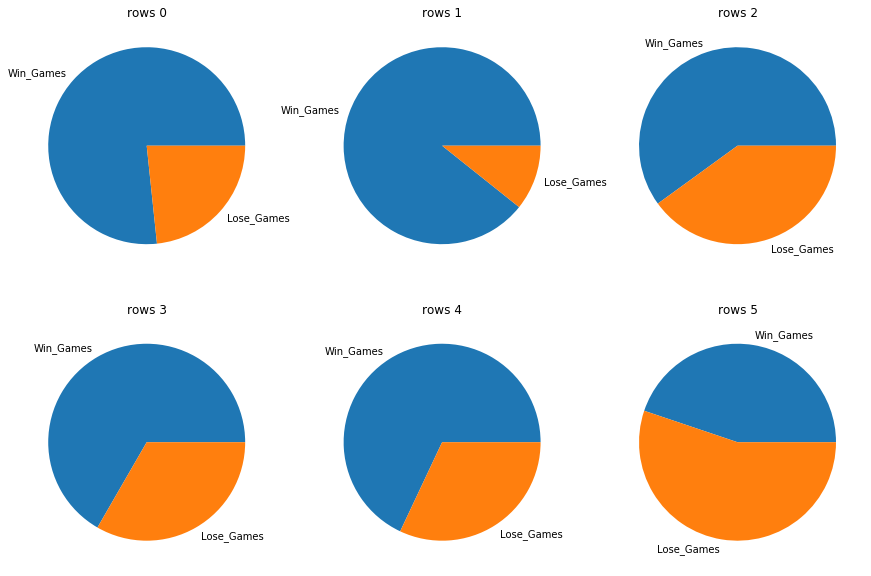

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Recreate a similar dataframe
rows = ['rows {}'.format(i) for i in range(36)]
columns = ['Win_Games', 'Lose_Games']
col1 = statsDF['Win_Games']
col2 = statsDF['Lose_Games']
data = zip(col1, col2)

df = pd.DataFrame(data=data, index=rows, columns=columns)

# Plotting

fig = plt.figure(figsize=(15,10))

for i, (name, row) in enumerate(df.iterrows()):
    ax = plt.subplot(2,3, i+1)
    ax.set_title(row.name)
    ax.set_aspect('equal')
    ax.pie(row, labels=row.index)

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Recreate a similar dataframe
rows = ['rows {}'.format(i) for i in range(5)]
columns = ['hits', 'misses']
col1 = np.random.random(5)
col2 = 1 - col1
data = zip(col1, col2)

df = pd.DataFrame(data=data, index=rows, columns=columns)

# Plotting

fig = plt.figure(figsize=(15,10))

for i, (name, row) in enumerate(df.iterrows()):
    ax = plt.subplot(2,3, i+1)
    ax.set_title(row.name)
    ax.set_aspect('equal')
    ax.pie(row, labels=row.index)

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(300,4), columns=list("ABCD"))
df["group"] = np.random.choice(["yes", "no"], p=[0.32,0.68],size=300)

df2 = pd.melt(df, id_vars='group', value_vars=list("ABCD"), value_name='value')

bins=np.linspace(df2.value.min(), df2.value.max(), 10)
g = sns.FacetGrid(df2, col="variable", hue="group", palette="Set1", col_wrap=2)
g.map(plt.hist, 'value', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [ ]:
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.distplot(df1[col])

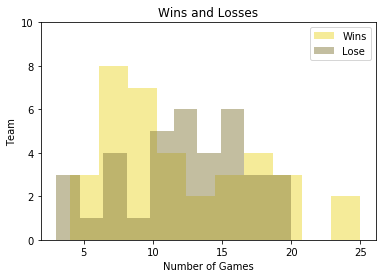

In [191]:
#Histogram try 1
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
# Make two variables of the attacker and defender size, but leaving out
# cases when there are over 10000 attackers
data1 = statsDF['Win_Games']
data2 = statsDF['Lose_Games']

# Plot a histogram of attacker size
plt.hist(data1, 
         alpha=0.5, 
         color='#EDD834',
         label='Wins')

# Plot a histogram of defender size
plt.hist(data2, 
         alpha=0.5, 
         color='#887E43',
         label='Lose')

# Set the x and y boundaries of the figure
plt.ylim([0, 10])

# Set the title and labels
plt.title('Wins and Losses')
plt.xlabel('Number of Games')
plt.ylabel('Team')
plt.legend(loc='upper right')

plt.show()

In [219]:
import requests
from datetime import timedelta, date

In [220]:
class weather_getter:
    #precip() Enter date as YYYY-MM-DD. Returns a boolean T/F for whether there was precipitation in Berlin that day.
    #enter a date range start date, end date 
    def __init__(self, start_date, end_date):
        self.start_date = start_date
        self.end_date = end_date
    
    def daterange(self):
        #parse dates from string type
        if type(self.start_date)==str:
            s_year = int(self.start_date[:4])
            s_month = int(self.start_date[5:7])
            s_day = int(self.start_date[8:])
            self.start_date = date(s_year, s_month, s_day)
        if type(self.end_date)==str:
            e_year = int(self.end_date[:4])
            e_month = int(self.end_date[5:7])
            e_day = int(self.end_date[8:])
            self.end_date = date(e_year, e_month, e_day)
        dates = []
        for n in range(int ((self.end_date - self.start_date).days)+1):
            current_date = self.start_date + timedelta(n)
            dates.append(current_date.strftime("%Y-%m-%d"))
        return dates
    
    def precip(self, date):    
        resp = requests.get("https://api.darksky.net/forecast/6bb9533b8324c3e5349243c1bdf9cacd/52.5200,13.4050,{}T12:00:00+0100".format(date))
        return bool(eval(resp.text)['daily']['data'][0]['precipProbability'])
    
    def rain_date(self):
        dates_range = self.daterange()
        date = []
        rain = []
        for d in dates_range:
            rainy_bool = self.precip(d)
            date.append(d)
            rain.append(rainy_bool)
        rain_dates = {'date': date, 'rain': rain}
        rain_dates_df = pd.DataFrame(rain_dates, columns = ['date', 'rain']).set_index('date')
        return rain_dates_df

In [222]:
c.execute("""SELECT min(date), max(date)
            FROM 'FlatView_Advanced'
            WHERE "Season"=2011;""").fetchall()

[('2011-07-15', '2012-05-06')]

In [237]:
berlin_dates = weather_getter('2011-07-15', '2012-05-06')
berlin_rain = berlin_dates.rain_date()

KeyboardInterrupt: 

In [238]:
berlin_rain.head()

,rain
date,
2011-07-15,False
2011-07-16,False
2011-07-17,True
2011-07-18,True
2011-07-19,False


In [229]:
results.head()

,Match_ID,Unique_Team_ID,Unique_Team,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TeamScores
0,1491,1,Bayern Munich,2011-08-07,Bayern Munich,M'gladbach,0,1,A,0.0
1,1094,1,Bayern Munich,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1.0
2,1211,1,Bayern Munich,2011-08-20,Bayern Munich,Hamburg,5,0,H,5.0
3,1104,1,Bayern Munich,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A,3.0
4,1197,1,Bayern Munich,2011-09-10,Bayern Munich,Freiburg,7,0,H,7.0


In [233]:
results_rain = results.merge(berlin_rain, left_on=['Date'], right_on=['date'])
results_rain.head()

,Match_ID,Unique_Team_ID,Unique_Team,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TeamScores,rain
0,1491,1,Bayern Munich,2011-08-07,Bayern Munich,M'gladbach,0,1,A,0.0,True
1,1276,3,Leverkusen,2011-08-07,Mainz,Leverkusen,2,0,H,0.0,True
2,1491,6,M'gladbach,2011-08-07,Bayern Munich,M'gladbach,0,1,A,1.0,True
3,1276,11,Mainz,2011-08-07,Mainz,Leverkusen,2,0,H,2.0,True
4,1171,14,Ein Frankfurt,2011-08-07,Braunschweig,Ein Frankfurt,0,3,A,3.0,True


In [279]:
def conditions(s):
    if (s['HomeTeam'] == s['Unique_Team']) and (s['FTR'] == 'H'):
        return 'W'
    elif (s['AwayTeam'] == s['Unique_Team']) and (s['FTR'] == 'A'):
        return 'W'
    else:
        return None

In [280]:
df['WLD'] = df.apply(conditions, axis=1)

In [281]:
df.head()

,Match_ID,Unique_Team_ID,Unique_Team,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,TeamScores,rain,WLD
0,1491,1,Bayern Munich,2011-08-07,Bayern Munich,M'gladbach,0,1,A,0.0,True,None
1,1276,3,Leverkusen,2011-08-07,Mainz,Leverkusen,2,0,H,0.0,True,None
2,1491,6,M'gladbach,2011-08-07,Bayern Munich,M'gladbach,0,1,A,1.0,True,W
3,1276,11,Mainz,2011-08-07,Mainz,Leverkusen,2,0,H,2.0,True,W
4,1171,14,Ein Frankfurt,2011-08-07,Braunschweig,Ein Frankfurt,0,3,A,3.0,True,W


In [282]:
rain_score_stats_temp = df.groupby('Unique_Team')['WLD'].sum()
rain_score_stats = pd.Series.to_frame(rain_score_stats_temp)
rain_score_stats.head()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
df = results_rain

df.loc[df['WLD']] = (df.loc[df['HomeTeam'] == df['Unique_Team']) & df['FTR'] == 'H'):
               df.loc[df[]]

In [236]:
results_rain.loc[results_rain['HomeTeam'] == results_rain['Unique_Team'], 'WLD'] = results_rain['FTHG']


NameError: name 'rain' is not defined

In [ ]:
#Create new df with teams and sums of TeamScores
score_stats_temp = results.groupby('Unique_Team')['TeamScores'].sum()
score_stats = pd.Series.to_frame(score_stats_temp)
score_stats.head()

In [ ]:
results_rain.loc[results_rain['HomeTeam'] == results_rain['Unique_Team'], 'WLD'] = results_rain['FTHG']
results.loc[results['AwayTeam'] == results['Unique_Team'], 'TeamScores'] = results['FTAG']
results.head()

In [ ]:
results_rain.query(('('rain'==True) & ('FTR'=='H') &(('HomeTeam'=='Unique_Team')|('AwayTeam'='Unique_Team')))
